**Build a linear regression model (eg. Predicting Robot Arm Temperature Using Linear Regression)**

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ============================================================
# Step 2: Create Robot Dataset
# ============================================================

# Features → Motor Speed, Load, Vibration
# Target → Temperature

data = {
    "Motor_Speed": [1000, 1200, 1100, 1300, 1500, 1400, 1600, 1700, 1800, 2000],
    "Load":        [10, 12, 11, 13, 15, 14, 16, 17, 18, 20],
    "Vibration":   [0.20, 0.25, 0.22, 0.30, 0.35, 0.33, 0.40, 0.42, 0.45, 0.50],
    "Temperature": [45, 47, 46, 48, 50, 49, 51, 52, 53, 55]
}

df = pd.DataFrame(data)

print("Robot Arm Dataset:\n")
print(df)

Robot Arm Dataset:

   Motor_Speed  Load  Vibration  Temperature
0         1000    10       0.20           45
1         1200    12       0.25           47
2         1100    11       0.22           46
3         1300    13       0.30           48
4         1500    15       0.35           50
5         1400    14       0.33           49
6         1600    16       0.40           51
7         1700    17       0.42           52
8         1800    18       0.45           53
9         2000    20       0.50           55


In [3]:
# ============================================================
# Step 3: Separate Features & Target
# ============================================================

X = df[["Motor_Speed", "Load", "Vibration"]]   # Independent variables
y = df["Temperature"]                          # Dependent variable

In [4]:
# ============================================================
# Step 4: Train-Test Split
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42
)

print("\nTraining Samples:", len(X_train))
print("Testing Samples:", len(X_test))


Training Samples: 7
Testing Samples: 3


In [5]:
# ============================================================
# Step 5: Build Linear Regression Model
# ============================================================

model = LinearRegression()

model.fit(X_train, y_train)

print("\nModel Training Completed")


Model Training Completed


In [6]:
# ============================================================
# Step 6: Model Coefficients
# ============================================================

print("\nIntercept:", model.intercept_)
print("Coefficients:")

for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature} → {coef}")


Intercept: 35.0
Coefficients:
Motor_Speed → 0.00999900009999
Load → 9.999000099990002e-05
Vibration → 5.861124099623173e-15


In [7]:
# ============================================================
# Step 7: Prediction
# ============================================================

y_pred = model.predict(X_test)

print("\nActual Temperatures:\n", y_test.values)
print("\nPredicted Temperatures:\n", y_pred)


Actual Temperatures:
 [53 47 49]

Predicted Temperatures:
 [53. 47. 49.]


In [8]:
# ============================================================
# Step 8: Model Evaluation
# ============================================================

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.0
R2 Score: 1.0


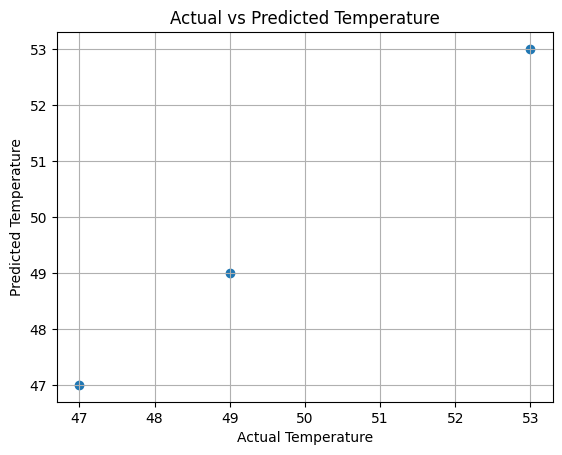

In [9]:
# ============================================================
# Step 9: Visualization (Actual vs Predicted)
# ============================================================

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.grid(True)
plt.show()

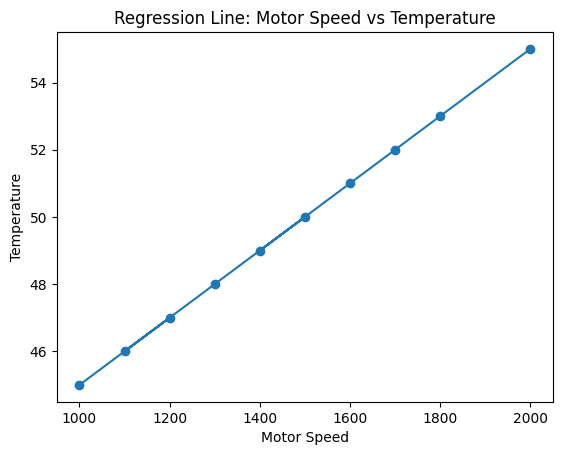

In [12]:
# ============================================================
# Step 10: Regression Line Visualization
# (Using single feature for visualization clarity)
# ============================================================

# Using Motor Speed vs Temperature

X_single = df[["Motor_Speed"]]
y_single = df["Temperature"]

model_single = LinearRegression()
model_single.fit(X_single, y_single)

y_line = model_single.predict(X_single)

plt.figure()
plt.scatter(X_single, y_single)
plt.plot(X_single, y_line)
plt.xlabel("Motor Speed")
plt.ylabel("Temperature")
plt.title("Regression Line: Motor Speed vs Temperature")
plt.show()

In [13]:
# ============================================================
# Step 11: Predict New Data
# ============================================================

new_data = np.array([[1500, 15, 0.36]])

predicted_temp = model.predict(new_data)

print("\nPredicted Temperature for New Input:", predicted_temp[0])


Predicted Temperature for New Input: 50.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
